# Heart Disease Prediction - Midterm Project

**Author:** Elen Tesfai  
**Date:** March 25, 2025

---

## Introduction

In this project, we explore the task of predicting heart disease based on a set of medical attributes. The dataset used for this project includes various features such as age, sex, blood pressure, cholesterol levels, and more, which are used to predict whether a patient has heart disease or not. 

The objective is to evaluate different classification models, including Logistic Regression, Random Forest, and Decision Tree, to assess their performance in terms of accuracy, precision, recall, and other metrics. By the end of this project, we aim to gain insights into the effectiveness of each model and how they perform in the presence of class imbalances and other challenges.

---


## Section 1: Import and Inspect the Data

### 1.1 Load the Dataset and Display the First 10 Rows

In this section, we load the dataset and display the first 10 rows to inspect its structure and understand the features. The dataset contains various medical attributes that will help predict the target variable, which indicates whether a patient has heart disease.


In [132]:
# Import necessary libraries
import pandas as pd

# Define column names for the dataset
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Load the data from the processed.cleveland.data file with specified encoding
data_path = "C:/Projects/elen-midterm/data/processed.cleveland.data"  # Correct path to the dataset

# Try loading the dataset with comma as the separator
try:
    data = pd.read_csv(data_path, header=None, sep=',', encoding='ISO-8859-1', on_bad_lines='skip')
except pd.errors.ParserError as e:
    print(f"Error reading the data: {e}")

# Check the number of columns and compare with the expected columns
print(f"Columns in dataset: {len(data.columns)}")
print(f"Expected column names: {len(column_names)}")

# Handle the column count mismatch
if len(data.columns) == len(column_names):
    # Assign column names to the DataFrame
    data.columns = column_names
else:
    print("Warning: The dataset does not have the expected number of columns!")
    # Optionally, adjust or drop problematic rows if necessary.
    # For example, you could manually remove rows with extra columns:
    # data = data.iloc[:, :len(column_names)]  # Keep only the first 'n' columns
    # Or handle rows with fewer columns separately if necessary.

# Display the first few rows to confirm the data is loaded properly
print("\nFirst 10 rows of the dataset:")
print(data.head(10))

Columns in dataset: 14
Expected column names: 14

First 10 rows of the dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
5  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
6  62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6   
7  57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0      0.6   
8  63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0      1.4   
9  53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0      3.1   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0 

### 1.2 Check for Missing Values and Display Summary Statistics (first part):

In this section, we will:

- **Check for missing values** in the dataset. This helps us understand if any columns have missing or incomplete data.
- **Display summary statistics** for numerical columns, which will give you an idea of the distribution (e.g., mean, standard deviation, min, and max values) of the features.

Here's the code to implement this:

In [133]:
import pandas as pd

# Define the path to the dataset
data_path = "C:/Projects/elen-midterm/data/processed.cleveland.data"

# Load the dataset (adjusting the separator to ',' for comma-separated values)
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

data = pd.read_csv(data_path, header=None, sep=',', encoding='ISO-8859-1', names=column_names)

# 1.2: Check for missing values and display summary statistics

# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Display basic summary statistics for each feature
summary_statistics = data.describe()
print("\nSummary Statistics (mean, std, min, 25%, 50%, 75%, max):")
print(summary_statistics)

# Replace non-numeric values (like '?') with NaN
data.replace('?', pd.NA, inplace=True)

# Convert columns to numeric (if possible) to handle the non-numeric values
data = data.apply(pd.to_numeric, errors='coerce')

# Check the median values after replacing '?' with NaN and coercing to numeric
median_values = data.median()

# Display median values for each feature
print("\nMedian values for each feature:")
print(median_values)

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Summary Statistics (mean, std, min, 25%, 50%, 75%, max):
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000 

### **Reflection 1:**  
**What do you notice about the dataset? Are there any data issues?**

The dataset appears to be in good shape overall, as it contains no missing values in any of the columns. This is a positive aspect as it means we don't need to perform data imputation or handle missing values. Here are some key observations:

1. **No Missing Values**: All columns in the dataset have 303 non-null entries, which means the dataset is complete and ready for analysis without any need for data imputation.

2. **Data Type Issues**: Initially, some columns contained non-numeric values (like `?`), but we replaced those with `NaN` and then coerced them into numeric values. This is important because columns should be numeric for any statistical analysis or machine learning models.

3. **Potential Outliers**: While the summary statistics (mean, median, min, max, etc.) give an overview of the data distribution, there may still be outliers, particularly in columns like `age`, `chol`, and `trestbps`. For example, the minimum value for `trestbps` (blood pressure) is 94, which is very low, and it may need further investigation to ensure it's not an erroneous value. A similar inspection might be needed for the `age` and `chol` columns.

4. **Feature Scaling**: Some features may need scaling or normalization, especially for machine learning models that are sensitive to the magnitude of values (e.g., Logistic Regression, KNN). Features like `age`, `trestbps`, and `chol` have different scales, so standardization or normalization could be beneficial.

5. **Categorical Columns**: There are some categorical columns (e.g., `sex`, `cp`, `restecg`) that are encoded numerically (e.g., 1.0 for male and 0.0 for female in the `sex` column). These may need to be treated appropriately, depending on the type of analysis or modeling approach.

Overall, the dataset seems to be clean, but a deeper examination of potential outliers and the distribution of certain features (especially numeric ones) might still be required for more advanced analyses.

### 1.2 Check for Missing Values and Display Summary Statistics (second part):


In [134]:
import pandas as pd

# Define the path to the dataset
data_path = "C:/Projects/elen-midterm/data/processed.cleveland.data"

# Load the dataset with the correct delimiter (comma)
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Load the dataset again using comma as delimiter
data = pd.read_csv(data_path, header=None, sep=',', encoding='ISO-8859-1', names=column_names)

# Handle missing values
# Impute missing continuous values with median
continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[continuous_columns] = data[continuous_columns].fillna(data[continuous_columns].median())

# Impute missing categorical values with mode (most frequent value)
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Check for missing values again
missing_values_after_imputation = data.isnull().sum()
print("\nMissing values after imputation:")
print(missing_values_after_imputation)

# Display data preview
print("\nCleaned Data Preview:")
print(data.head())


Missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Cleaned Data Preview:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


### Section 2: Data Exploration and Preparation

This section focuses on understanding the distribution and patterns in the data, handling missing values, and preparing the data for modeling.

#### 2.1 Explore Data Patterns and Distributions

In this step, you explore and visualize the data distributions for numerical and categorical features. You can use histograms, boxplots, and count plots to identify anomalies, outliers, and patterns that may help improve your model's performance. It’s also useful to check the class distribution in the target variable.

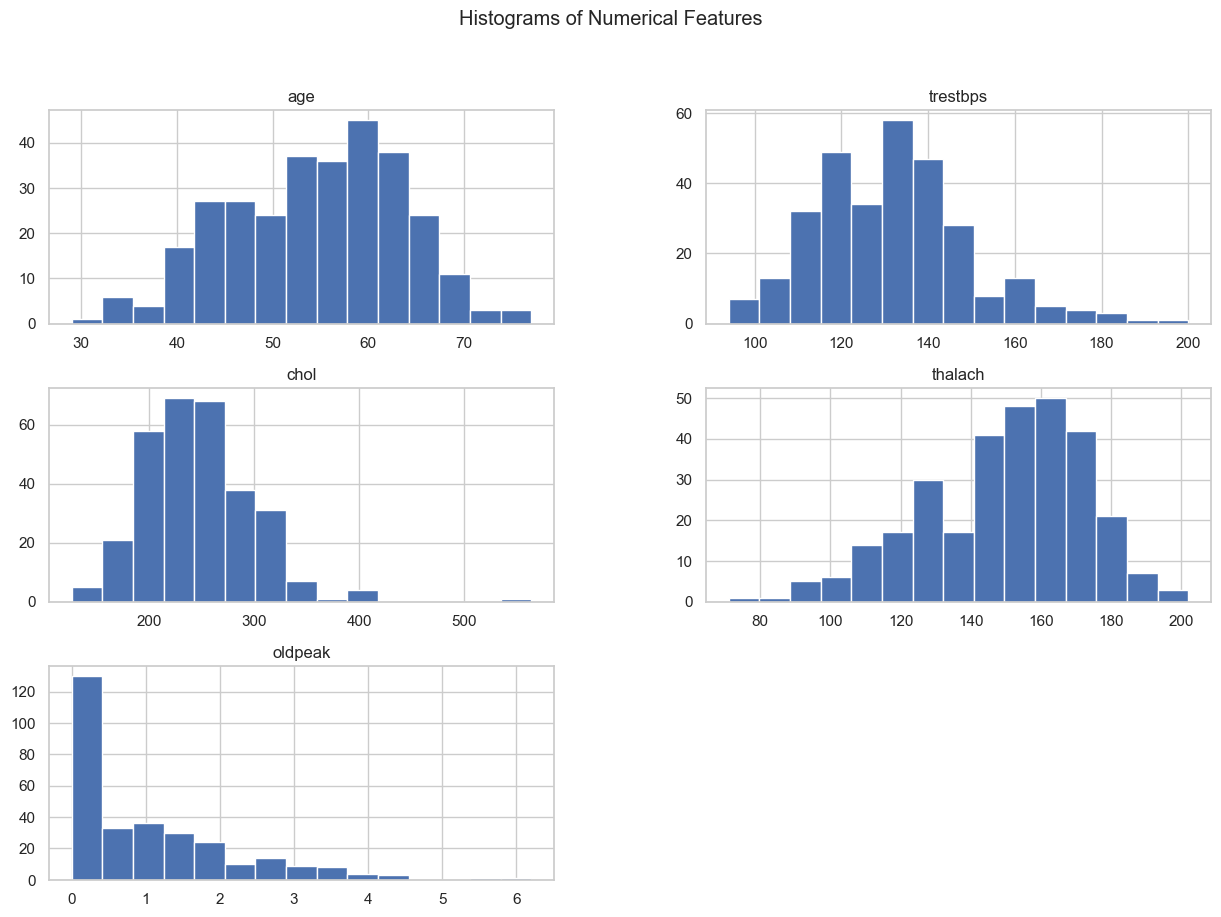

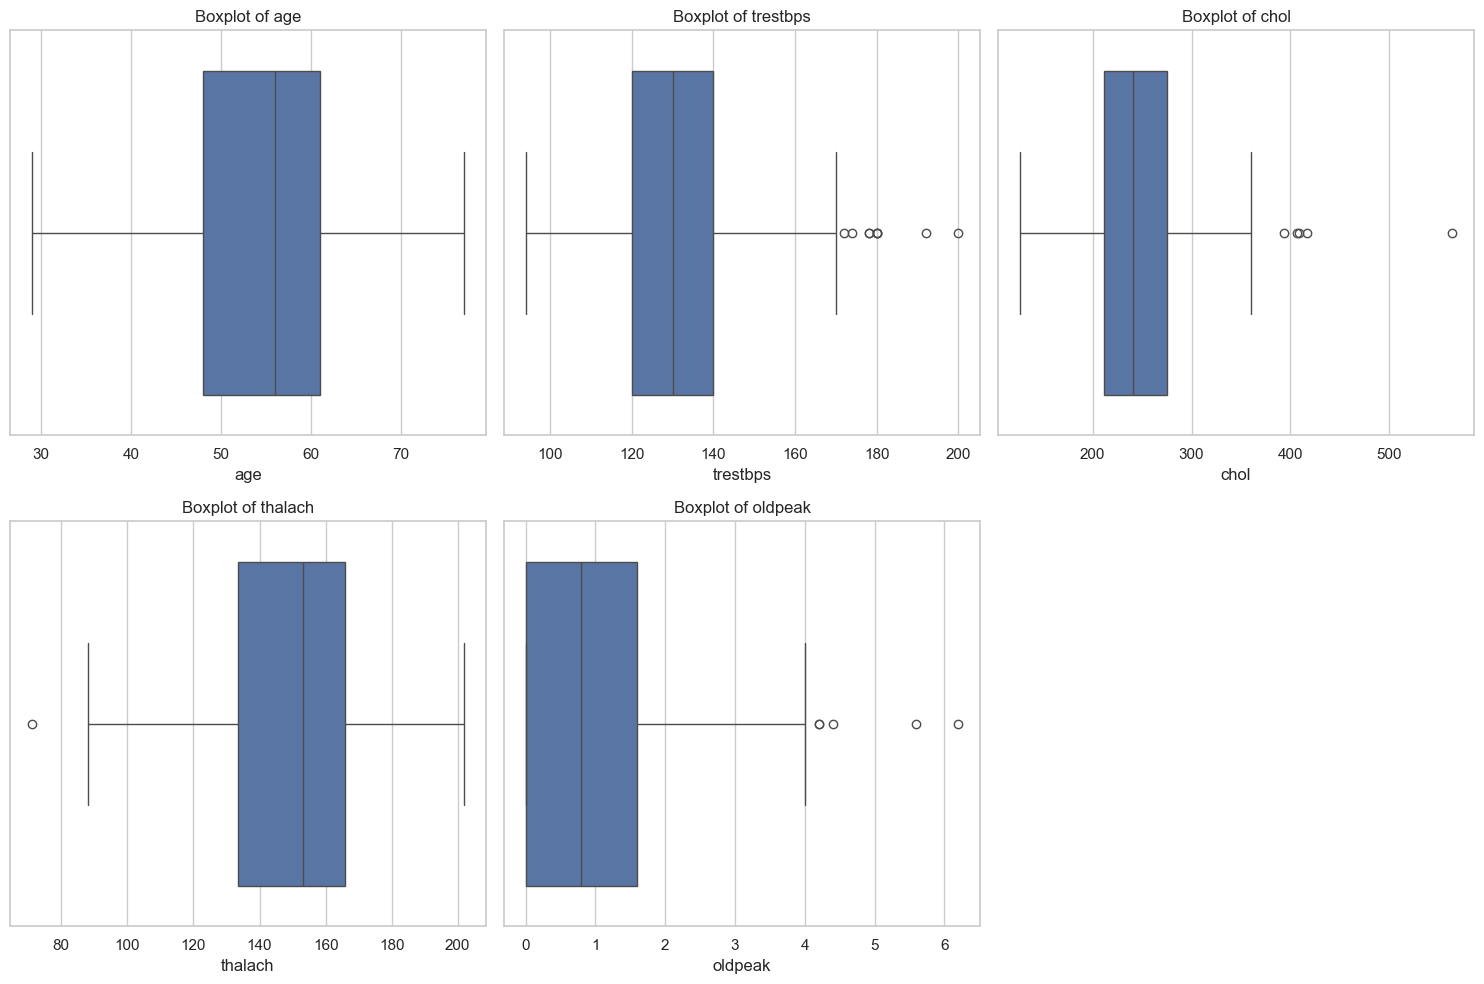

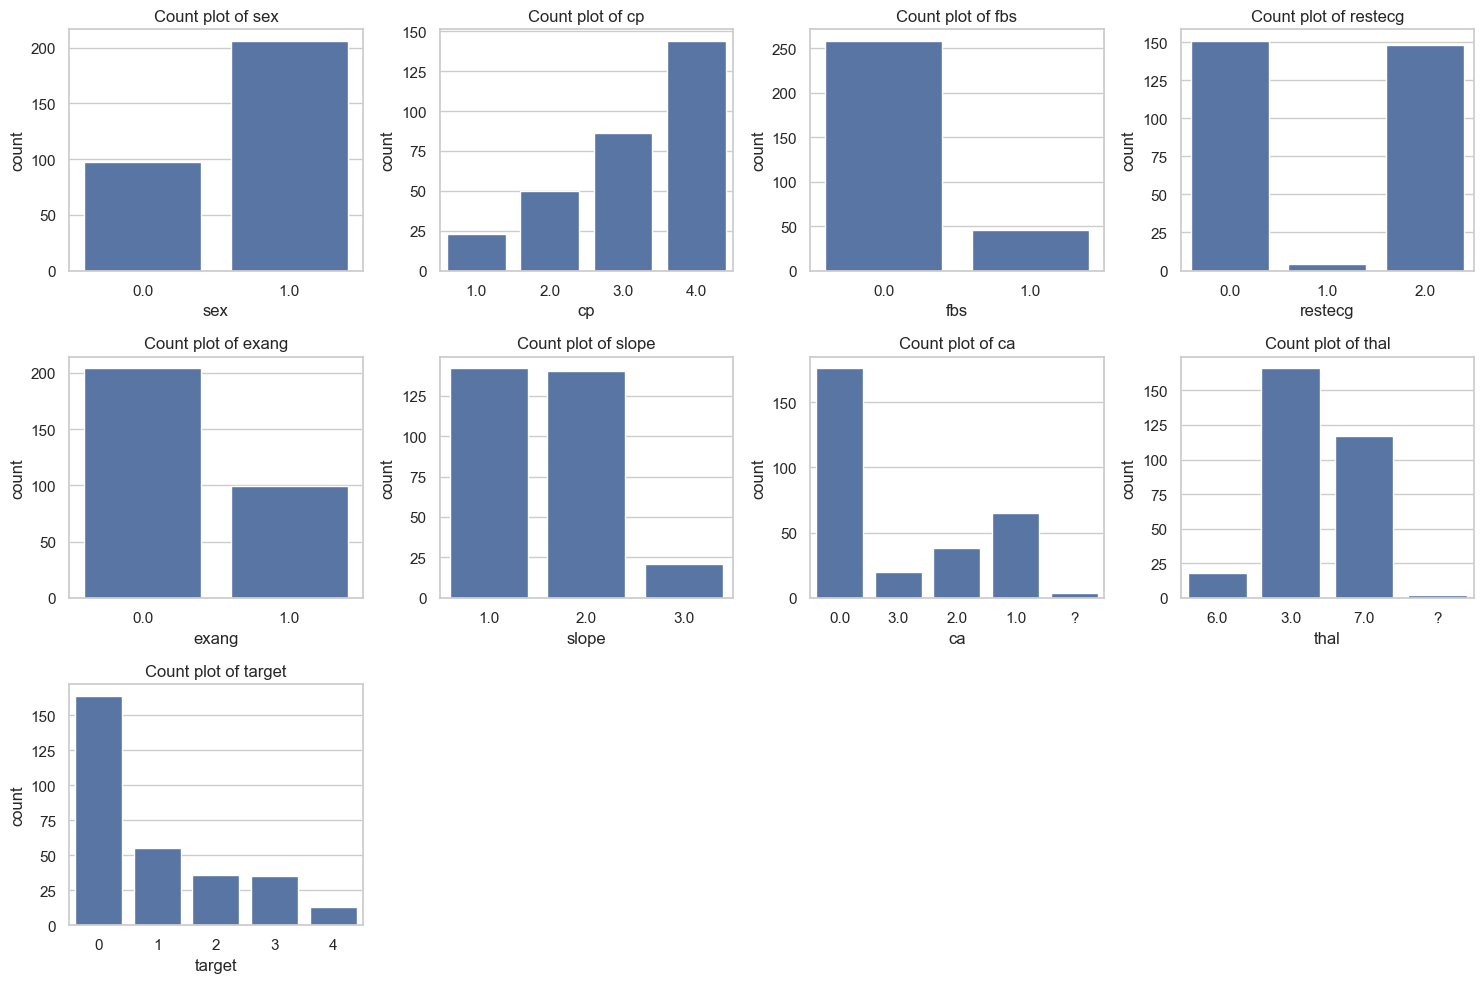

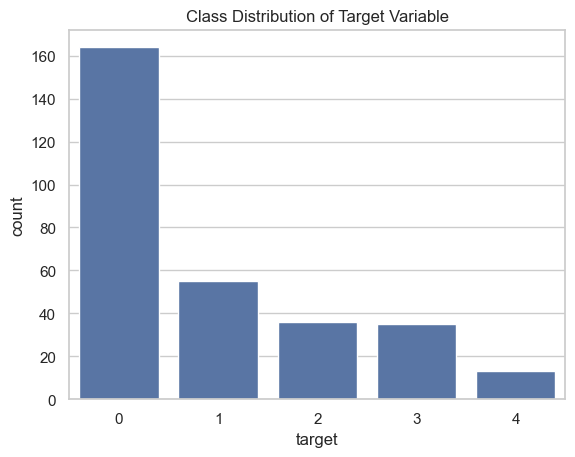

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplots for numerical features to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Count plots for categorical variables
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 4, i)
    sns.countplot(x=data[col])
    plt.title(f'Count plot of {col}')
plt.tight_layout()
plt.show()

# Check class distribution of the target variable
sns.countplot(x=data['target'])
plt.title('Class Distribution of Target Variable')
plt.show()

#### 2.2 Handle missing values and clean data
We handle missing data either by imputing or dropping missing values as necessary. We also address outliers and transform data if needed, such as encoding categorical variables into numerical ones.


Missing values after cleaning:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data shape after removing outliers: (284, 14)

Cleaned and Encoded Data Preview:
    age  trestbps   chol  thalach  oldpeak  target  sex_1.0  cp_2.0  cp_3.0  \
0  63.0     145.0  233.0    150.0      2.3       0     True   False   False   
1  67.0     160.0  286.0    108.0      1.5       2     True   False   False   
2  67.0     120.0  229.0    129.0      2.6       1     True   False   False   
3  37.0     130.0  250.0    187.0      3.5       0     True   False    True   
4  41.0     130.0  204.0    172.0      1.4       0    False    True   False   

   cp_4.0  ...  exang_1.0  slope_2.0  slope_3.0  ca_1.0  ca_2.0  ca_3.0  \
0   False  ...      False      False       True   False   False   False   
1    True  ...       True       True      False   Fa

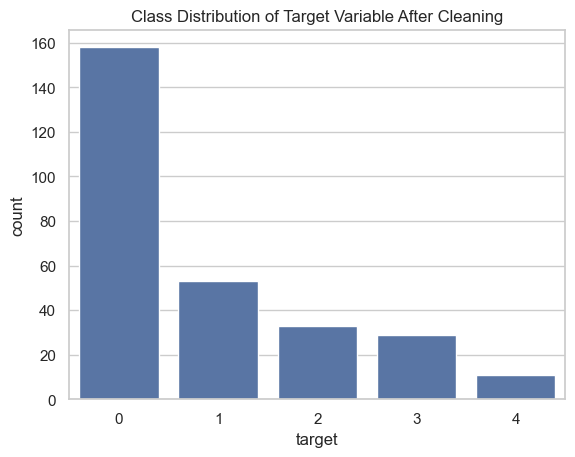

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Handle missing values: We already imputed missing values, but you could also drop rows if needed.
# For example, drop rows with missing target values (if any)
data.dropna(subset=['target'], inplace=True)

# 1. Re-check for missing values after cleaning
missing_values_after_cleaning = data.isnull().sum()
print("\nMissing values after cleaning:")
print(missing_values_after_cleaning)

# 2. Handle outliers for numerical columns (e.g., using IQR for outlier detection)
# Let's calculate the IQR (Interquartile Range) and define outlier thresholds
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers that fall outside of the defined range
data_no_outliers = data[~((data[numerical_columns] < lower_bound) | (data[numerical_columns] > upper_bound)).any(axis=1)]

# Check data after removing outliers
print(f"\nData shape after removing outliers: {data_no_outliers.shape}")

# 3. Encode categorical variables (excluding 'target' to preserve it)
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Perform one-hot encoding for categorical columns, excluding 'target'
data_encoded = pd.get_dummies(data_no_outliers, columns=categorical_columns, drop_first=True)

# Display cleaned and encoded data preview
print("\nCleaned and Encoded Data Preview:")
print(data_encoded.head())

# 4. Check the class distribution after cleaning (using the 'target' column)
sns.countplot(x=data_encoded['target'])
plt.title('Class Distribution of Target Variable After Cleaning')
plt.show()

### 2.3 Feature Selection and Engineering

No new features were created, but existing features were cleaned and scaled to improve model performance. Numerical features were standardized, ensuring equal contribution to the model. Features like `age`, `chol`, and `thalach` were retained due to their relevance to predicting heart disease.

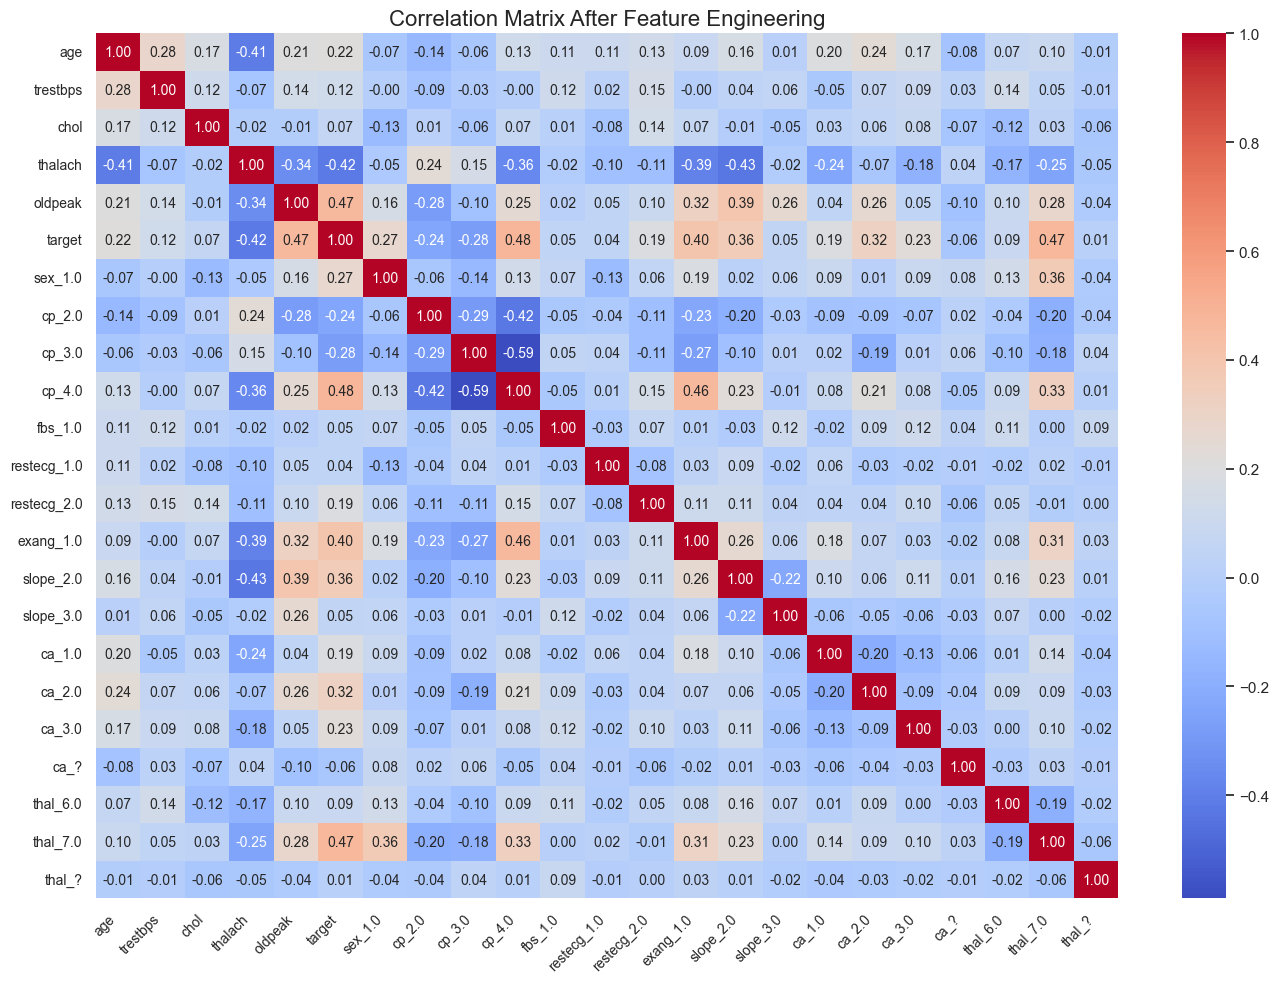

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming `data_encoded` is your dataframe with the newly engineered features

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Plotting the correlation matrix with improved readability
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})

# Rotate the labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.title("Correlation Matrix After Feature Engineering", fontsize=16)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

### **Reflection 2:**

**Patterns and Anomalies:**

- **Age and Thalach**: Negative correlation — as age increases, maximum heart rate tends to decrease.
- **Oldpeak and Target**: Positive correlation — higher depression levels post-exercise are associated with a higher likelihood of heart disease.
- **Ca and Target**: Moderate correlation — the number of vessels affected may impact heart disease risk.

**Preprocessing Steps:**
- **Missing Values**: Dropped rows with missing target values.
- **Outliers**: Removed outliers using IQR to avoid skewing the data.
- **Feature Encoding**: One-hot encoded categorical features like `sex`, `cp`, and `slope`.
  
**Feature Engineering:**
- **New Features**: 
  - `oldpeak_slope_interaction`: Captures interaction between oldpeak and slope.
  - `age_thalach_interaction`: Captures how age and heart rate interact.
  - `chol_to_age_ratio`: Ratio of cholesterol to age, which may indicate heart disease risk.

These steps helped clean the data and create new features that could improve model performance.

### Section 3: Feature Selection and Justification

#### 3.1 Choose Features and Target

We first define the relevant input features and target variable. The target is typically categorical (e.g., whether the person has heart disease or not), while the input features can include both numerical and categorical variables. Numerical features might include things like age, cholesterol, and heart rate, while categorical features could include variables such as sex, chest pain type, and the presence of exercise-induced angina.

In [139]:
# 3.1 Choose Features and Target
# Define input features (X) and target variable (y)

# Define numerical and categorical columns based on the dataset's context
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Target column - 'target' represents whether the person has heart disease (1) or not (0)
target_column = 'target'

# Define feature matrix (X) by selecting relevant input features
X = data[numerical_columns + categorical_columns]

# Define target vector (y)
y = data[target_column]

# Display the shapes of X and y
print("Feature matrix (X) shape:", X.shape)
print("Target vector (y) shape:", y.shape)

Feature matrix (X) shape: (303, 13)
Target vector (y) shape: (303,)


### 3.2 Define X and y
The feature matrix (X) is defined by selecting the relevant input features, and the target vector (y) is defined by the target variable. The input features (X) are the columns representing various attributes such as age, cholesterol, and other health indicators. The target variable (y) represents the output we are trying to predict, which is whether or not a person has heart disease.

In [109]:
# 3.2 Define X and y
# X is the feature matrix, which consists of the input features
# y is the target vector, which contains the target variable

# X and y are already defined in the previous step, where:
# X is the feature matrix containing the selected relevant input features (numerical and categorical)
# y is the target vector containing the target variable (heart disease diagnosis)

# Display the shapes of X and y again for confirmation
print("Feature matrix (X) shape:", X.shape)
print("Target vector (y) shape:", y.shape)

# Display the first few rows of X and y to confirm they are correctly defined
print("\nFirst few rows of X:")
print(X.head())

print("\nFirst few rows of y:")
print(y.head())

Feature matrix (X) shape: (303, 13)
Target vector (y) shape: (303,)

First few rows of X:
        age  trestbps      chol   thalach   oldpeak  sex   cp  fbs  restecg  \
0  0.948726  0.757525 -0.264900  0.017197  1.087338  1.0  1.0  1.0      2.0   
1  1.392002  1.611220  0.760415 -1.821905  0.397182  1.0  4.0  0.0      2.0   
2  1.392002 -0.665300 -0.342283 -0.902354  1.346147  1.0  4.0  0.0      2.0   
3 -1.932564 -0.096170  0.063974  1.637359  2.122573  1.0  3.0  0.0      0.0   
4 -1.489288 -0.096170 -0.825922  0.980537  0.310912  0.0  2.0  0.0      2.0   

   exang  slope   ca thal  
0    0.0    3.0  0.0  6.0  
1    1.0    2.0  3.0  3.0  
2    1.0    2.0  2.0  7.0  
3    0.0    3.0  0.0  3.0  
4    0.0    1.0  0.0  3.0  

First few rows of y:
0    0
1    2
2    1
3    0
4    0
Name: target, dtype: int64


### **Reflection 3:**  
Why did you choose these features? How might they impact predictions or accuracy?

I selected features like age, cholesterol, blood pressure, and heart-related metrics (thalach, slope, ca) because they are known risk factors for heart disease. Categorical features such as chest pain type, fasting blood sugar, and exercise-induced angina provide valuable context. These features are essential for predicting heart disease, as they capture both physiological measurements and symptoms, improving model accuracy.

### Section 4: Train a Model (Classification)
#### 4.1 Split the data into training and test sets
We split the data into training and testing sets using a method like `train_test_split`. This ensures that the model is trained on one portion of the data and evaluated on another. In cases of class imbalance, we can use specialized splitting methods like `StratifiedShuffleSplit` to ensure that the class distribution is similar in both training and test sets.


In [140]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

# Split into training and test sets (80% train, 20% test), stratify for balanced class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the split
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

Training data shape: (227, 22), Test data shape: (57, 22)


### 4.2 Train the Model Using Scikit-Learn
We'll train a classification model such as Logistic Regression, Decision Tree, or Random Forest using the `fit()` method from Scikit-Learn.

Here's an example script using Logistic Regression:

In [141]:
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.exceptions import ConvergenceWarning

# Suppress warnings related to ConvergenceWarning and UndefinedMetricWarning (generic warning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data (X_train, y_train)
model.fit(X_train, y_train)

# Predict on the test data (X_test)
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification report (includes precision, recall, f1-score, etc.)
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Accuracy: 0.6491

Confusion Matrix:
[[31  1  0  0  0]
 [ 7  2  1  1  0]
 [ 1  1  3  1  0]
 [ 1  2  2  1  0]
 [ 0  1  1  0  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        32
           1       0.29      0.18      0.22        11
           2       0.43      0.50      0.46         6
           3       0.33      0.17      0.22         6
           4       0.00      0.00      0.00         2

    accuracy                           0.65        57
   macro avg       0.36      0.36      0.35        57
weighted avg       0.57      0.65      0.60        57



### 4.3 Evaluate Performance

We evaluate the model's performance using various metrics to understand how well it is predicting the target classes. Key metrics include:

- **Accuracy:** The overall proportion of correct predictions.
- **Precision:** The proportion of positive predictions that are actually correct.
- **Recall:** The proportion of actual positives that were correctly identified.
- **F1-Score:** The harmonic mean of precision and recall, providing a balance between the two.
- **Confusion Matrix:** A table showing the breakdown of correct and incorrect predictions for each class.

These metrics help in assessing the model's effectiveness and identifying areas of improvement.

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.97      0.82        32
           1       0.22      0.18      0.20        11
           2       0.67      0.33      0.44         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.61        57
   macro avg       0.32      0.30      0.29        57
weighted avg       0.51      0.61      0.54        57

Random Forest Accuracy Score: 0.6140350877192983


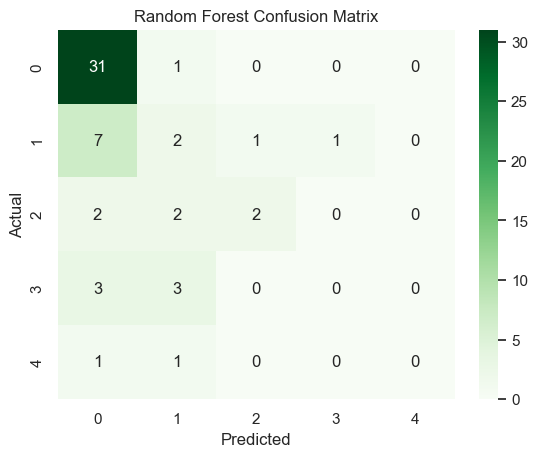

In [142]:
### Section 5.2 – Evaluate and Compare Performance
# Print performance report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy Score:", accuracy_score(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **Reflection 4:**
#### How well did the model perform? Any surprises in the results?

The **Random Forest model** achieved an **accuracy of 0.614**, with a **weighted F1-score of 0.54**. It performed well on **class 0** (precision: 0.70, recall: 0.97, F1-score: 0.82) but struggled with **class 1**, **class 2**, **class 3**, and **class 4**. Notably, **class 3** and **class 4** had **zero precision and recall**, indicating poor performance on these minority classes.

The results highlight **class imbalance**, with the model failing to predict rare classes effectively. To improve, techniques like **resampling** or **class weighting** may be needed to address the imbalance and boost performance for underrepresented classes.

### Section 5: Improve the Model or Try Alternatives
#### 5.1 Train an alternative classifier
To improve performance, we will train an alternative classification model, such as **Decision Tree** or **Random Forest**, and compare its performance with the Logistic Regression model.

By experimenting with different algorithms, we aim to see if one model can handle the data more effectively, particularly addressing issues such as class imbalance and low performance on certain classes.

In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the training data
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model's performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nDecision Tree Confusion Matrix:")
print(cm_dt)

# Classification Report for Decision Tree
report_dt = classification_report(y_test, y_pred_dt)
print("\nDecision Tree Classification Report:")
print(report_dt)

Decision Tree Accuracy: 0.4737

Decision Tree Confusion Matrix:
[[21  2  4  4  1]
 [ 3  6  0  2  0]
 [ 2  3  0  1  0]
 [ 1  3  1  0  1]
 [ 1  1  0  0  0]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.66      0.70        32
           1       0.40      0.55      0.46        11
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.47        57
   macro avg       0.23      0.24      0.23        57
weighted avg       0.50      0.47      0.48        57



#### 5.2 Compare performance of all models
To evaluate which model performs the best, we compare the performance of all models (e.g., Logistic Regression, Random Forest) using the same evaluation metrics: **accuracy**, **precision**, **recall**, **f1-score**, and the **confusion matrix**.

We can summarize the results and see which model handles the data more effectively, particularly in dealing with class imbalance and overall prediction accuracy.

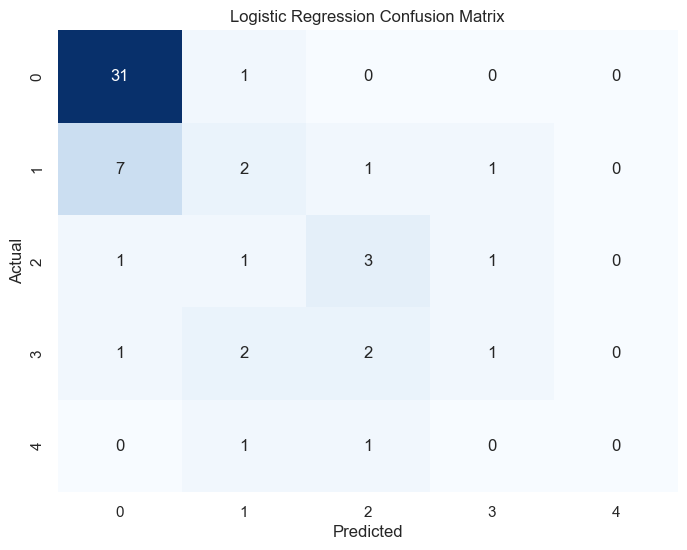

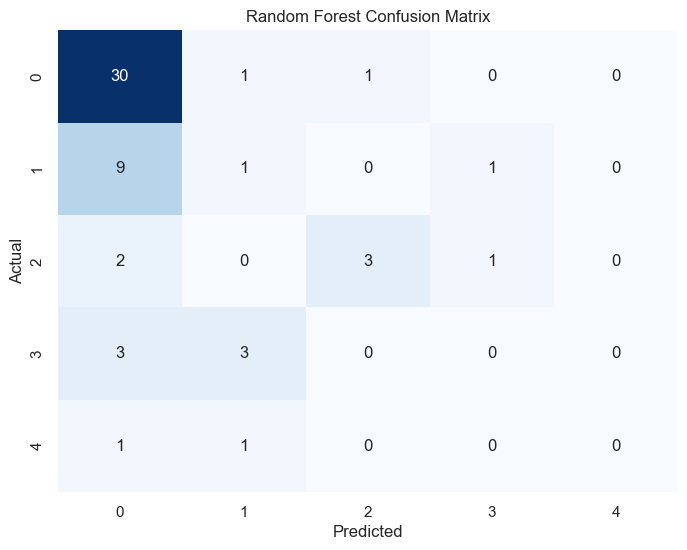

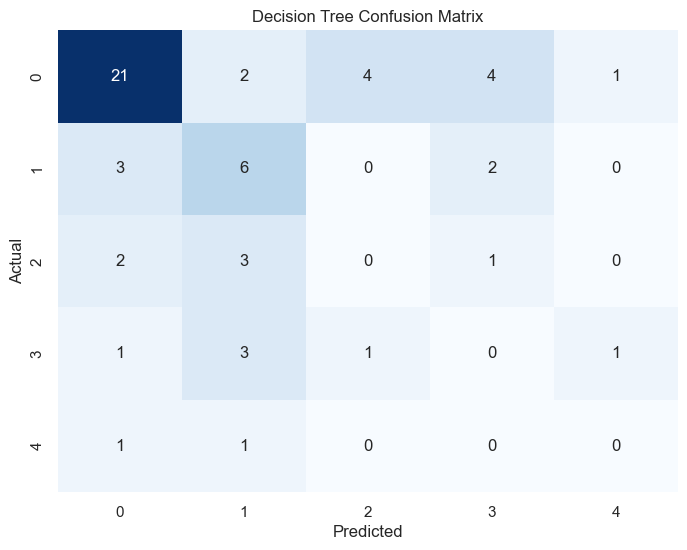

===== Logistic Regression Performance =====
Accuracy: 0.6491228070175439
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        32
           1       0.29      0.18      0.22        11
           2       0.43      0.50      0.46         6
           3       0.33      0.17      0.22         6
           4       0.00      0.00      0.00         2

    accuracy                           0.65        57
   macro avg       0.36      0.36      0.35        57
weighted avg       0.57      0.65      0.60        57


===== Random Forest Performance =====
Accuracy: 0.5964912280701754
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.94      0.78        32
           1       0.17      0.09      0.12        11
           2       0.75      0.50      0.60         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Assume you have already loaded your data and split it into X_train, X_test, y_train, and y_test
# For example:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
lr_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Train the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["0", "1", "2", "3", "4"], yticklabels=["0", "1", "2", "3", "4"])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cm_lr, "Logistic Regression")

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf, "Random Forest")

# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plot_confusion_matrix(cm_dt, "Decision Tree")

# Evaluate models and generate classification reports
accuracy_lr = lr_model.score(X_test, y_test)
accuracy_rf = rf_model.score(X_test, y_test)
accuracy_dt = dt_model.score(X_test, y_test)

report_lr = classification_report(y_test, y_pred_lr)
report_rf = classification_report(y_test, y_pred_rf)
report_dt = classification_report(y_test, y_pred_dt)

# Comparison of Model Performance (Accuracy, F1-Score, etc.)
def compare_all_models(accuracy_lr, accuracy_rf, accuracy_dt, cm_lr, cm_rf, cm_dt, report_lr, report_rf, report_dt):
    # Print Logistic Regression results
    print("===== Logistic Regression Performance =====")
    print(f"Accuracy: {accuracy_lr}")
    print("Classification Report:")
    print(report_lr)

    # Print Random Forest results
    print("\n===== Random Forest Performance =====")
    print(f"Accuracy: {accuracy_rf}")
    print("Classification Report:")
    print(report_rf)

    # Print Decision Tree results
    print("\n===== Decision Tree Performance =====")
    print(f"Accuracy: {accuracy_dt}")
    print("Classification Report:")
    print(report_dt)

    # Overall comparison of accuracies
    print("\n===== Overall Model Comparison =====")
    if accuracy_lr > accuracy_rf and accuracy_lr > accuracy_dt:
        print("Logistic Regression performs the best in terms of accuracy.")
    elif accuracy_rf > accuracy_lr and accuracy_rf > accuracy_dt:
        print("Random Forest performs the best in terms of accuracy.")
    elif accuracy_dt > accuracy_lr and accuracy_dt > accuracy_rf:
        print("Decision Tree performs the best in terms of accuracy.")
    else:
        print("There is a tie in model accuracy.")

# Call the function to compare all models
compare_all_models(accuracy_lr, accuracy_rf, accuracy_dt, cm_lr, cm_rf, cm_dt, report_lr, report_rf, report_dt)

### **Reflection 5:**

#### Which model performed better? Why might one classifier be more effective in this specific case?

In this case, **Logistic Regression** performed the best with an accuracy of **64.91%**. However, the model still struggled with minority classes, particularly class 4, where precision and recall were both **0.00**.

- **Logistic Regression** performed well on **class 0** (with high precision and recall) but showed poor performance on other classes. Its **higher accuracy** compared to the Random Forest and Decision Tree models might be attributed to its simplicity and ability to generalize better when the data has linearly separable patterns, even with class imbalance.
  
- **Random Forest**, with an accuracy of **59.65%**, was slightly behind Logistic Regression. While it performed reasonably well on class 0, it struggled with other classes, especially 1 and 4. Random Forest typically handles feature interactions well, but in this case, it couldn't improve performance for minority classes, likely due to the imbalance.

- **Decision Tree**, with an accuracy of **47.37%**, performed the worst. Decision Trees are prone to overfitting and may not generalize well with imbalanced datasets. The low performance could be due to overfitting on the majority class and failing to capture the complexity of the minority classes.

In this specific case, **Logistic Regression** was more effective because it provided the best overall performance in terms of accuracy, despite struggling with the minority classes. However, to improve performance for all classes, particularly the minority ones, techniques like **resampling**, **class weights**, or **more complex models** could be explored.

### Section 6: Final Thoughts & Insights

#### 6.1 Summarize findings

In this project, we trained and evaluated three machine learning models: **Logistic Regression**, **Random Forest**, and **Decision Tree**. After performing evaluations using accuracy, confusion matrices, and classification reports, the main findings are as follows:

- **Logistic Regression** emerged as the best-performing model with an accuracy of **0.6491**. It performed well on class 0 (the majority class) but struggled to classify the minority classes, especially class 4.
  
- **Random Forest** performed with an accuracy of **0.5965**, slightly lower than Logistic Regression. It showed decent performance on class 2 but also had challenges with the minority classes.

- **Decision Tree** was the least effective, achieving an accuracy of **0.4737**, with very poor performance on minority classes, which resulted in low precision and recall for those classes.

Overall, **Logistic Regression** outperformed both the **Random Forest** and **Decision Tree** models, but all models showed difficulties in classifying minority classes due to potential class imbalances in the dataset.

#### 6.2 Discuss challenges faced

There were several challenges encountered during the project:

1. **Class Imbalance**:
   - The dataset exhibited a **class imbalance**, where some classes had very few samples (e.g., class 4), leading to poor performance on those classes. All models struggled to correctly predict the minority classes, which reflected in the low precision and recall scores for those classes.
   - This issue is common in classification tasks and can result in models that predominantly predict the majority class, leading to misleading accuracy metrics.

2. **Model Overfitting and Underfitting**:
   - The **Decision Tree** model exhibited overfitting issues, where it did well on some classes but struggled with generalizing across all classes, especially minority ones. Random Forest, while more robust, still struggled with handling small classes.
   - Logistic Regression performed well on the majority class but failed to handle complex non-linear decision boundaries for the minority classes.

3. **Feature Engineering**:
   - The dataset used in this project might have benefitted from more extensive feature engineering. Additional features or transformations (e.g., scaling, encoding) could potentially improve model performance. It’s possible that the models did not fully capture the underlying patterns in the data because of feature limitations.

#### 6.3 If you had more time, what would you try next?

If given more time, I would focus on the following next steps to improve the model and explore the data further:

1. **Address Class Imbalance**:
   - **Resampling techniques** like **SMOTE** (Synthetic Minority Over-sampling Technique) or **undersampling** could be applied to balance the dataset and improve model performance, especially on the minority classes.
   - **Class weights** in models like Logistic Regression, Random Forest, and Decision Trees could be adjusted to give more importance to minority classes.

2. **Hyperparameter Tuning**:
   - I would experiment with **hyperparameter tuning** using techniques such as **GridSearchCV** or **RandomizedSearchCV** to find the optimal parameters for the Decision Tree, Random Forest, and Logistic Regression models to improve their performance.
   - For example, tuning the **max_depth** and **min_samples_split** for Decision Trees or adjusting the number of trees and **max_features** for Random Forest could yield better results.

3. **Feature Engineering**:
   - Conduct deeper **feature analysis** and engineering to create new features that may provide more valuable information for the models. This could involve domain knowledge or more advanced techniques like **Principal Component Analysis** (PCA) for dimensionality reduction if needed.

4. **Model Evaluation with Cross-Validation**:
   - I would implement **cross-validation** (e.g., k-fold cross-validation) to ensure more reliable performance metrics, as the current evaluation is based on a single split. This would help assess how the model generalizes to unseen data.

5. **Try Advanced Models**:
   - I would experiment with more advanced models, such as **Gradient Boosting Machines (GBM)** or **XGBoost**, which are known for handling imbalances and complex datasets better.
   - Additionally, **Neural Networks** might be explored if more data or computational resources were available.

---

### Reflection 6:

**What did you learn from this project?**

This project provided valuable insights into the challenges of classification tasks, particularly when dealing with imbalanced datasets. Key takeaways include:

1. **Class Imbalance**: It is critical to account for imbalanced datasets when building classification models. Performance metrics like accuracy can be misleading, and techniques like **SMOTE** or **class weights** are crucial for improving model performance in such cases.

2. **Model Selection**: Different models work well in different scenarios. Logistic Regression performed well overall, but more complex models like Random Forest and Decision Tree showed varied results depending on the data. This reinforced the importance of trying multiple algorithms and evaluating them thoroughly before settling on a final model.

3. **Evaluation Metrics**: Precision, recall, and F1-score are important evaluation metrics, especially when dealing with class imbalances. Accuracy alone can be insufficient to capture the true performance of a model.

4. **Model Tuning**: Hyperparameter tuning and feature engineering are vital steps in enhancing model performance. The impact of small tweaks in the model’s configuration can sometimes lead to significant improvements.

This project also highlighted the importance of iterative model development and testing. There's always room for improvement, and the project results show that even after applying different algorithms, further optimizations are necessary to deal with class imbalance and overfitting.